In [1]:
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs

from sklearn.inspection import DecisionBoundaryDisplay

import sys
if not sys.path.__contains__('..'): sys.path.append('..') #hack to import from parent directory
from plot_utils import visualize_tree, grid_plot


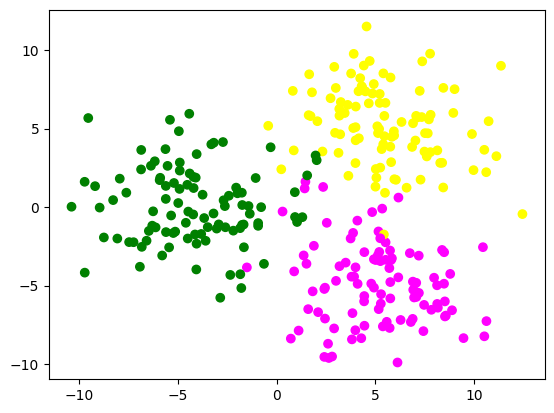

In [2]:
centers=[[-5, 0], [5, 5], [5, -5]]
blobs = make_blobs(centers=centers, cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [3]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504, min_impurity_decrease=.02)
tree_clf.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=504)

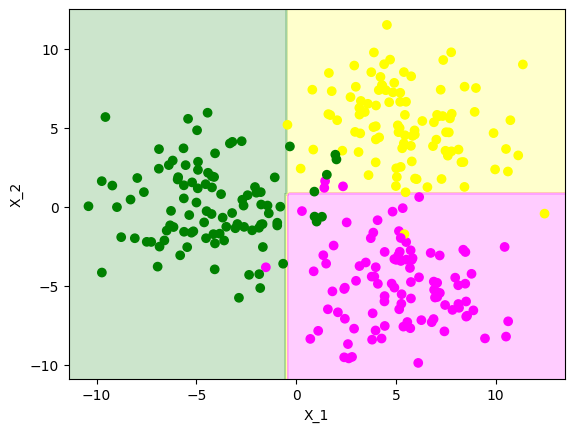

In [4]:
DecisionBoundaryDisplay.from_estimator(tree_clf, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


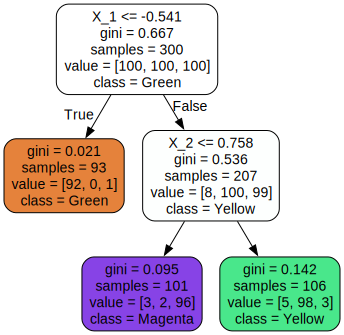

In [5]:
visualize_tree(tree_clf, ["X_1", "X_2"], ["Green", "Yellow", "Magenta"])

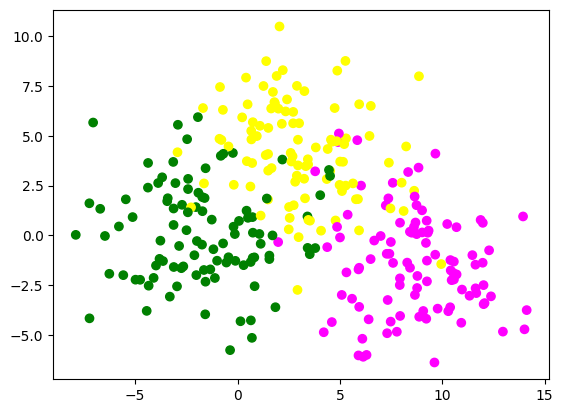

In [6]:
blobs = make_blobs(centers=[[-2.5, 0], [2.5, 4], [8.5, -1.5]], cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [7]:

tree_clf = DecisionTreeClassifier(random_state=504, min_impurity_decrease=.02)
tree_clf.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=504)

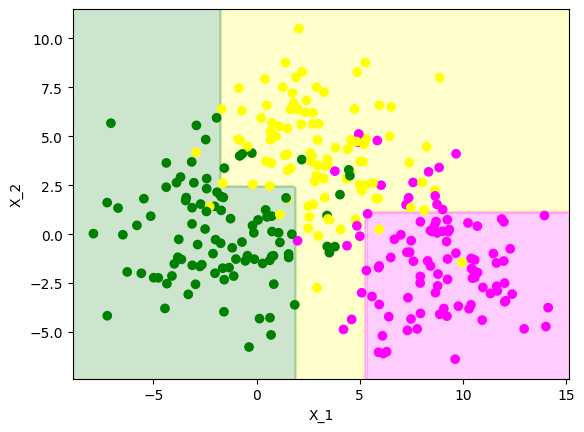

In [8]:
DecisionBoundaryDisplay.from_estimator(tree_clf, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


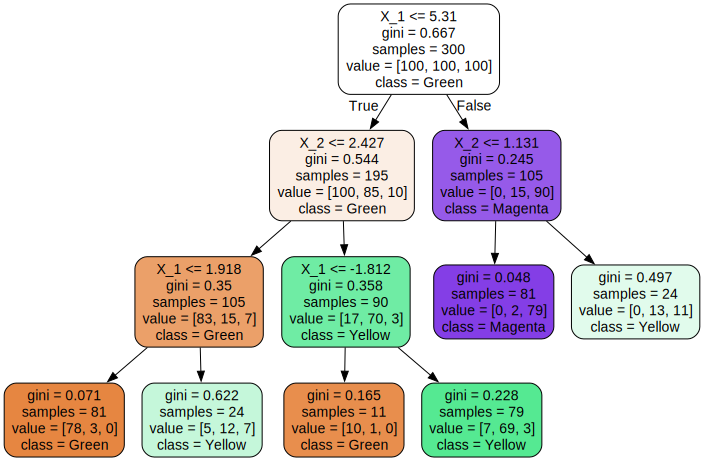

In [9]:
visualize_tree(tree_clf, ["X_1", "X_2"], ["Green", "Yellow", "Magenta"])

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=504, min_impurity_decrease=.02, n_estimators=15)
forest_clf.fit(X, y)

RandomForestClassifier(min_impurity_decrease=0.02, n_estimators=15,
                       random_state=504)

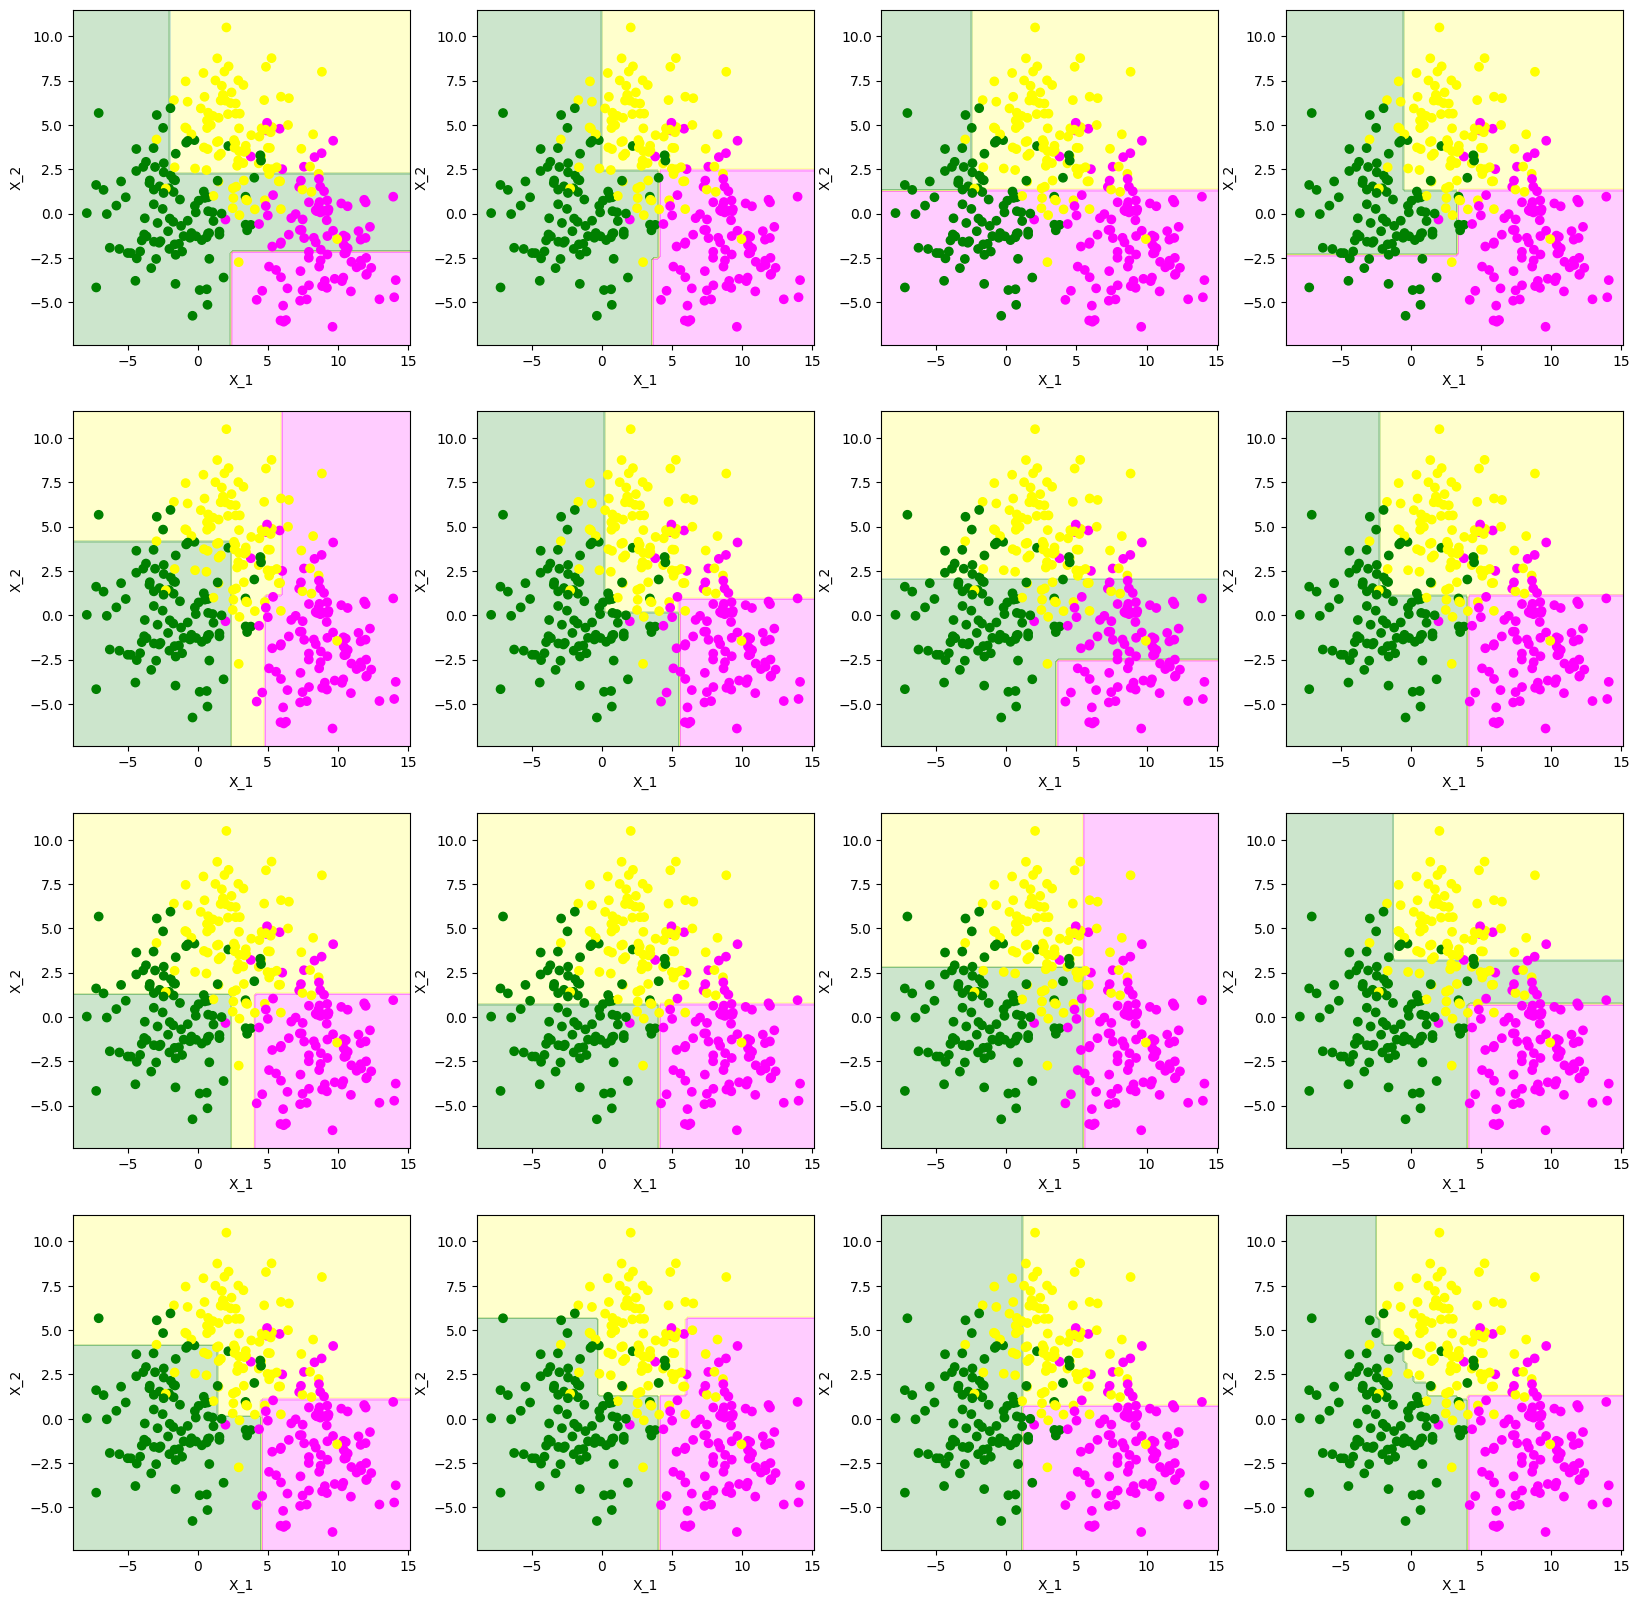

In [11]:
trees = forest_clf.estimators_

def plot(ax, model):
    DecisionBoundaryDisplay.from_estimator(model, X, ax=ax, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


axes = grid_plot(trees, 4, 4, plot)
plot(axes[3][3], forest_clf)
